<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-19/Li2_3_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1005, done.
remote: Counting objects: 100% (295/295), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 1005 (delta 185), reused 255 (delta 163), pack-reused 710
Receiving objects: 100% (1005/1005), 59.53 MiB | 7.93 MiB/s, done.
Resolving deltas: 100% (554/554), done.
Updating files: 100% (132/132), done.


'/content'

In [3]:
%cd "/content/gator/data/07-19/"

/content/gator/data/07-19


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [5]:
prep_csv('defbuffer1_0719_120655.csv')
df = pd.read_csv('defbuffer1_0719_120655.csv')


Fill Mode,1



In [6]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,0.073251,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,0.999961,Volt DC,1.0,T,2W,F,F,0.000000
1,0.073218,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,0.999961,Volt DC,1.0,T,2W,F,F,0.069393
2,0.073187,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,0.999961,Volt DC,1.0,T,2W,F,F,0.138739
3,0.073158,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,0.999960,Volt DC,1.0,T,2W,F,F,0.208069
4,0.073132,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,0.999960,Volt DC,1.0,T,2W,F,F,0.277413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26287,0.072650,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,0.999957,Volt DC,1.0,T,2W,F,F,1960.741256
26288,0.072650,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,0.999957,Volt DC,1.0,T,2W,F,F,1960.810583
26289,0.072651,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,0.999956,Volt DC,1.0,T,2W,F,F,1960.879888
26290,0.072651,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,0.999957,Volt DC,1.0,T,2W,F,F,1960.949200


In [7]:
# Time (s)
T = df['Relative Time']

# Current (mA)
I = df['Reading']*1e9

# Potential (mV)
V = df['Value']

Text(0.5, 0, 'Time (s)')

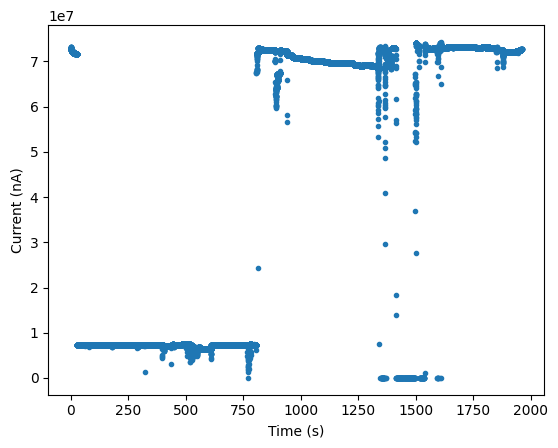

In [8]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

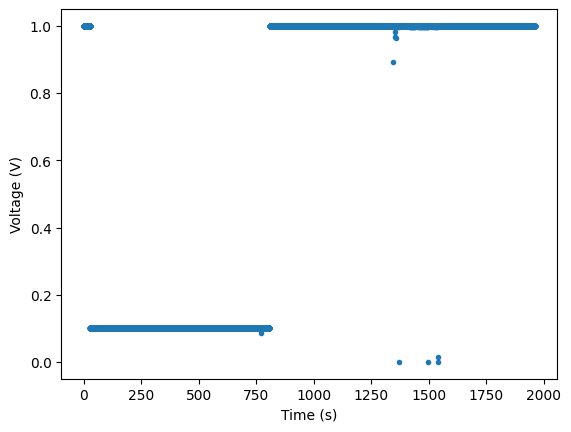

In [9]:
cut1 = 0
cut2 = -1
V_numeric = np.array(V, dtype=float)

mask = V_numeric < 1
T=T[mask]
V=V_numeric[mask]
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')